In [227]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

from module.one_dim.layers import *
from module.one_dim.generators import *

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
shape = (100, 100)
inputs = tf.keras.Input(100)
x = IntensityToElectricField()(inputs)
#x = Modulation()(x)
#x = AngularSpectrum(z=0.1e-3, method="expand")(x)
x = ElectricFieldToIntensity()(x)
# x = Detector(10, padding=0.2, interval=1.0)(x)
x = Filter(10, padding=0.2, interval=1.0)(x)

model = tf.keras.Model(inputs, x)

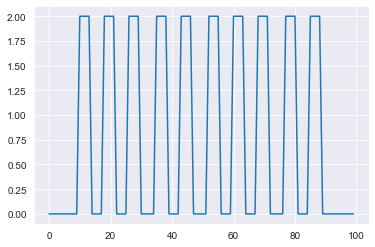

In [9]:
array = np.ones([5, 100])
array[0,:] = 2

pred = model.predict(array)
plt.plot(pred[0,:])

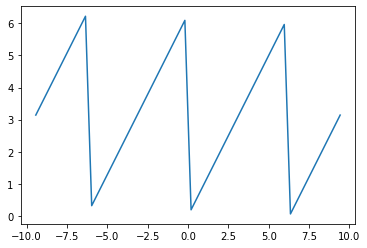

In [6]:
phase = np.linspace(-3*np.pi, 3*np.pi)
plt.plot(phase, phase % (2*np.pi))

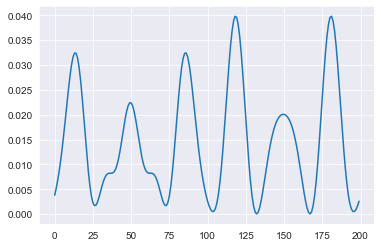

In [134]:
input_pattern = np.zeros(200)
input_pattern[45:55] = 1
wavelength = 633e-9
z = 1.0e-2
d = 1.0e-6

u = np.fft.fftfreq(200, d=d)
w = np.where(u ** 2 <= 1 / wavelength ** 2, tf.sqrt(1 / wavelength**2 - u**2), 0).astype('float64')
h = np.exp(1.0j * 2 * np.pi * w * z)
du = 1/(2*200 * d)
u_limit = 1/(np.sqrt((2 * du * z)**2 + 1)) / wavelength
u_filter = np.where(np.abs(u)/(2*u_limit) <= 1/2, 1, 0)
h = h * u_filter
fft_input = np.fft.fft(input_pattern)
out = np.fft.ifft(fft_input * h)
I = np.abs(out)**2/2

plt.plot(I)

In [135]:
(2*(200*d)**2/(z*wavelength))

12.63823064770932

In [136]:
np.sum(u_filter)

13

In [3]:
model.save("trained_model/test")
model = tf.keras.models.load_model("trained_model/test")

INFO:tensorflow:Assets written to: trained_model/test/assets


In [228]:
padding = 0.0
width = 100
interval = 1.0
labels = y_test
filters = categorical_output(labels, width, padding, interval)

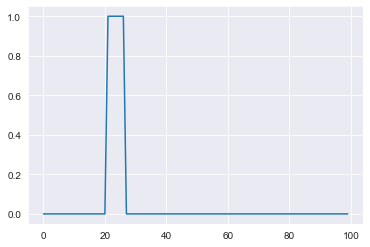